SVM is a classification algorithm that uses a hyperplane and support vectors to classify data point. SVMs are used for classification, regression as well as outlier detection.

Wikipedia: "SVM maps training examples to points in space so as to maximise the width of the gap between the two categories. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall." As of April 09, 2022

Advantages:
- Effective in high dimensional spaces.
- Still effective when the number of samples is smaller than number of dimensions.
- Uses a subset of training points in the decision function (called support vectors), thus is memory efficient.

Let's load the data. We'll use the bank data publicly available at https://archive.ics.uci.edu/ml/machine-learning-databases/00222/ as bank.zip

In [8]:
data = pd.read_csv("bank_data.csv", delimiter=";")
data.head(2)

<IPython.core.display.Javascript object>

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


Define the data to use for our task. For now, we can simply choose a few variables.

In [2]:
#Let's only choose a few variables to work for now
data = data[['age','balance','duration','y']]
data = data.iloc[:500,:] #I sliced data to only keep the first 500 observations to speed up the training -- otherwise, SVMs take really long to train.

#Recoding the y column as 1 and 0
data["y1"] = np.where(data["y"].str.contains("yes"), 1, 0)
data = data.loc[:, data.columns!='y']
data = data.rename(columns={'y1':'y'})
#data.describe()

<IPython.core.display.Javascript object>

We can now split the data and define the dependent variable and the independent variables.

In [3]:
#Splitting data into train and test data
train, test = train_test_split(data, test_size=0.2, random_state=42)

# get independent variables
X_train = train[['age','balance','duration']]

# get response variables
y_train = train[['y']]
y_train = np.ravel(y_train) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

We are now ready to run our model using the SVM classfier then make some predictions. Note that we use the linear kernel in this example, but other kernel functions exist (e.g., sigmoid, polynomial, rbf).

Important note: While SVMs are powerful tools, their compute and storage requirements increase rapidly and prohibitively with the number of training vectors. That is why we sliced the data down to 500 observations (instead of 4,000+).

In [4]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear', probability=True) # Add probability=True to allow predict_proba for AUC/ROC curves to work later

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
X_test = test[['age','balance','duration']]
y_test = test[['y']]
pred = clf.predict(X_test)

Next, we check how how model performerd. We now create a confusion matrix to check how the model did in terms of prediction.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

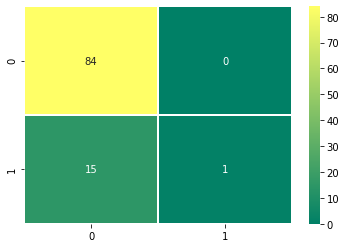

In [5]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=list(test['y']), y_pred=list((pred)))
sns.heatmap(cm, annot=True,fmt="d",linewidths=.5, cmap="summer")
plt.show()

We can also plot the ROC/AUC to check vizualize the model's performance.The bigger the Area Under the Curve (AUC), the better performance.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

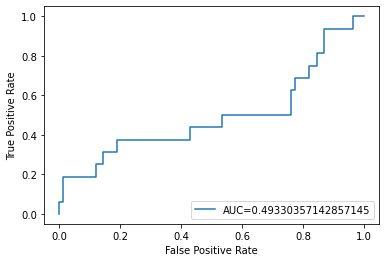

In [6]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

pred = clf.predict_proba(test[['age','balance','duration']])[:, 1]
fpr, tpr, thresholds = roc_curve(y_true=list(test['y']), y_score=list(pred))
auc = roc_auc_score(y_true=list(test['y']), y_score=list(pred))

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Checking the accuracy, Precision, and recall

In [7]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

pred = clf.predict(test[['age','balance','duration']])

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, pred))

Accuracy: 0.85
Precision: 1.0
Recall: 0.0625


### A Note of the Kernel Trick

When data is linearly separable, we can use a line to separate the data. However, when we do not have linearly separable data -- as is often the case with real-world data -- the kernel trick becomes very useful. The essence of the kernel trick is to help us separate the non-linear data by adding more dimensions to our data. When we increase the number of dimensions, we are likely to fid a hyperplane that can separate the data. To find more, check this post: https://towardsdatascience.com/understanding-support-vector-machine-part-2-kernel-trick-mercers-theorem-e1e6848c6c4d

Useful resources:
- https://en.wikipedia.org/wiki/Support-vector_machine
- https://scikit-learn.org/stable/modules/svm.html
- https://towardsdatascience.com/understanding-support-vector-machine-part-1-lagrange-multipliers-5c24a52ffc5e
- https://towardsdatascience.com/understanding-support-vector-machine-part-2-kernel-trick-mercers-theorem-e1e6848c6c4d